In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')

from model import TeslaValuation
from simulation import MonteCarlo

In [2]:
mc = MonteCarlo()
mc.simulate(5000)
sim = mc.getResults()
sim

Electric Vehicles                \
        Year Cars Produceable (units, not in millions)     Cars sold   
0     2025.0                              1.089766e+07  1.065236e+07   
1     2025.0                              1.039270e+07  9.824895e+06   
2     2025.0                              9.075389e+06  8.771742e+06   
3     2025.0                              1.221666e+07  1.187439e+07   
4     2025.0                              9.309015e+06  9.001416e+06   
...      ...                                       ...           ...   
4995  2025.0                              1.575972e+07  1.560824e+07   
4996  2025.0                              1.376146e+07  1.358367e+07   
4997  2025.0                              7.135337e+06  6.893776e+06   
4998  2025.0                              5.627377e+06  5.468336e+06   
4999  2025.0                              2.117421e+07  2.039538e+07   

                                                                    \
     Cumulative cars sold (modeled estimate) ASP (not in millions)   
0                               2.372273e+07               36108.0   
1                               2.438288e+07               36108.0   
2                               1.997324e+07               36108.0   
3                               2.500438e+07               36108.0   
4                               2.170446e+07               36108.0   
...                                      ...                   ...   
4995                            3.072903e+07               36108.0   
4996                            2.744105e+07               36108.0   
4997                            1.670395e+07               36108.0   
4998                            1.460553e+07               36108.0   
4999                            3.672548e+07               36108.0   

                                             \
     Revenue (EV business only, ex credits)   
0                              3.846353e+11   
1                              3.547573e+11   
2                              3.167301e+11   
3                              4.287603e+11   
4                              3.250231e+11   
...                                     ...   
4995                           5.635823e+11   
4996                           4.904793e+11   
4997                           2.489205e+11   
4998                           1.974507e+11   
4999                           7.364364e+11   

                                                                  \
     Part and labor and other cost per vehicle (not in millions)   
0                                          21798.491790            
1                                          21568.029282            
2                                          20163.576840            
3                                          18797.598189            
4                                          17900.247373            
...                                                 ...            
4995                                       16013.787968            
4996                                       16209.945927            
4997                                       19096.086030            
4998                                       22665.203620            
4999                                       16749.825037            

                                                          \
     Capital consumed per vehicle Total COGs per vehicle   
0                     1400.063679           23198.555470   
1                      734.566243           25078.505101   
2                     1872.744536           22036.321376   
3                     1883.715279           20681.313468   
4                     1056.238910           18956.486282   
...                           ...                    ...   
4995                  2038.957945           19450.508231   
4996                  2179.998756           18389.944684   
4997                  2020.780946           22535.883093   
4998                  1612.75033

In [3]:
mean = np.quantile(sim[(TeslaValuation.consolidatedCol, TeslaValuation.stockPriceCol)], 0.5)
bear = np.quantile(sim[(TeslaValuation.consolidatedCol, TeslaValuation.stockPriceCol)], 0.25)
bull = np.quantile(sim[(TeslaValuation.consolidatedCol, TeslaValuation.stockPriceCol)], 0.75)

print("Tesla 2025 share price:")
print("Mean: ", round(mean, 2))
print("Bear: ", round(bear, 2))
print("Bull: ", round(bull, 2))

Tesla 2025 share price:
Mean:  2976.05
Bear:  1640.0
Bull:  5173.72


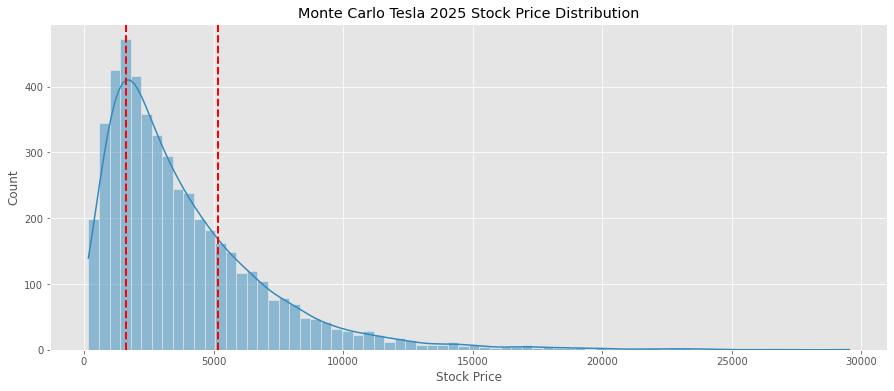

In [4]:
fig, ax = plt.subplots(figsize=(15,6))
sns.histplot(sim[(TeslaValuation.consolidatedCol, TeslaValuation.stockPriceCol)], ax=ax, kde=True)
ax.set_title("Monte Carlo Tesla 2025 Stock Price Distribution")
ax.set_xlabel("Stock Price")
ax.axvline(bear, color='r', linestyle='dashed', linewidth=2)
ax.axvline(bull, color='r', linestyle='dashed', linewidth=2);

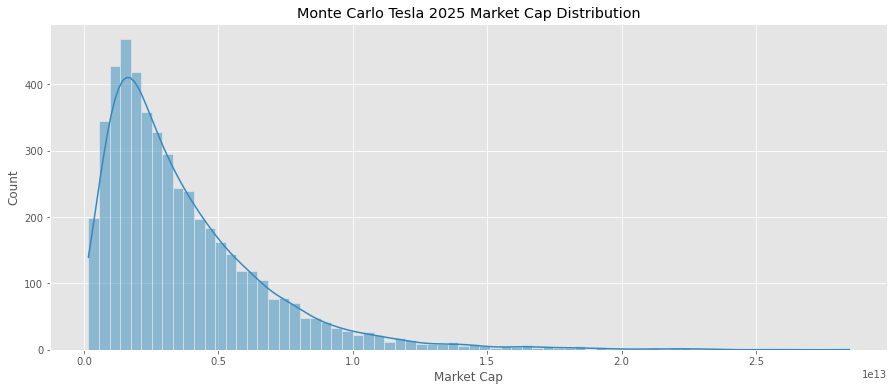

In [5]:
fig, ax = plt.subplots(figsize=(15,6))
sns.histplot(sim[(TeslaValuation.consolidatedCol, TeslaValuation.marketCapCol)], ax=ax, kde=True)
ax.set_title("Monte Carlo Tesla 2025 Market Cap Distribution")
ax.set_xlabel("Market Cap");

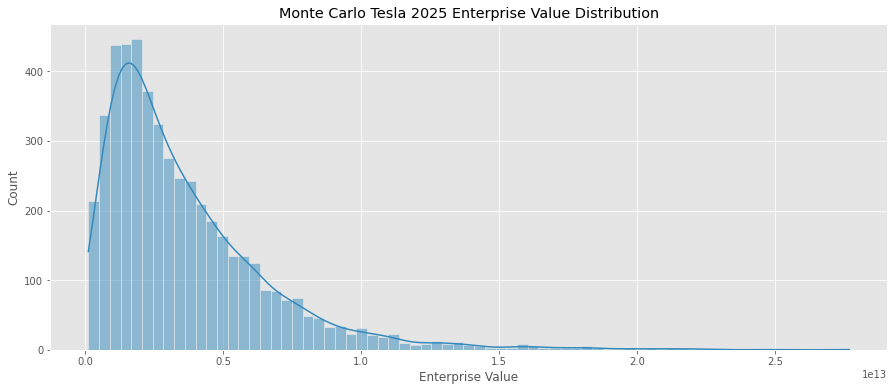

In [6]:
fig, ax = plt.subplots(figsize=(15,6))
sns.histplot(sim[(TeslaValuation.consolidatedCol, TeslaValuation.enterpriseValueCol)], ax=ax, kde=True)
ax.set_title("Monte Carlo Tesla 2025 Enterprise Value Distribution")
ax.set_xlabel("Enterprise Value");